## Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading "item_to_id.csv" Dataset :

In [2]:
items_data = pd.read_csv("item_to_id.csv")

In [3]:
items_data.shape

(48, 2)

In [4]:
items_data.head(48)

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39
5,dinner rolls,37
6,tortillas,34
7,bagels,13
8,canned vegetables,28
9,spaghetti sauce,26


In [5]:
items_data.isnull().sum()

Item_name    0
Item_id      0
dtype: int64

In [6]:
items_data.dtypes

Item_name    object
Item_id       int64
dtype: object

In [7]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item_name  48 non-null     object
 1   Item_id    48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [8]:
items_data.describe()

,Item_id
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


## Reading "purchase_history.csv" Dataset :

In [9]:
purchase_data = pd.read_csv("purchase_history.csv")

In [10]:
purchase_data.shape

(39474, 2)

In [11]:
purchase_data.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [12]:
purchase_data.isnull().sum()

user_id    0
id         0
dtype: int64

In [13]:
purchase_data.dtypes

user_id     int64
id         object
dtype: object

In [14]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  39474 non-null  int64 
 1   id       39474 non-null  object
dtypes: int64(1), object(1)
memory usage: 616.9+ KB


In [15]:
purchase_data.describe()

,user_id
count,3.947400e+04
mean,7.520149e+05
std,4.337258e+05
min,4.700000e+01
25%,3.735672e+05
50%,7.535835e+05
75%,1.124939e+06
max,1.499974e+06


## Data-Preprocessing :

In [16]:
def grocery_items(g):
    all_items_id = g['id'].str.split(',').sum()
    id_list = [0]*48
    for i in all_items_id :
        id_list[int(i) - 1] = id_list[int(i) - 1] + 1
    return pd.Series(id_list, index=list(range(1, 49)))

In [17]:
new_purchase_data = purchase_data.groupby('user_id').apply(grocery_items)

In [18]:
new_purchase_data.shape

(24885, 48)

In [19]:
new_purchase_data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [20]:
new_purchase_data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64

## Challenge - 1 :

The customer who has purchased maximum number of items all-around.

In [21]:
max_no_of_items_purchased = new_purchase_data.sum(axis=1).reset_index().rename(columns={0: 'count'})
max_no_of_items_purchased.sort_values(by='count', ascending=False).head()

,user_id,count
4445,269335,72
6111,367872,70
6623,397623,64
9918,599172,64
6291,377284,63


In [22]:
user_id, max_count = max_no_of_items_purchased .iloc[4445]
print("The customer who has purchased maximum number of items:",user_id,"and bought:",max_count,"items")

The customer who has purchased maximum number of items: 269335 and bought: 72 items


## Challenge - 2 :

In [23]:
each_purchased_max_items = new_purchase_data.apply(lambda s: pd.Series([s.idxmax(), s.max()], index=["max_user_id", "max_count"]))
each_purchased_max_items = each_purchased_max_items.transpose().reset_index()

In [24]:
each_purchased_max_items = each_purchased_max_items.join(items_data).loc[:, [ "Item_name", "max_user_id", "max_count"]]
each_purchased_max_items

,Item_name,max_user_id,max_count
0,coffee,31625,4
1,tea,31625,5
2,juice,154960,4
3,soda,5289,3
4,sandwich loaves,217277,3
5,dinner rolls,334664,4
6,tortillas,175865,3
7,bagels,151926,3
8,canned vegetables,269335,4
9,spaghetti sauce,618914,4


# Challenge - 3 :

In [25]:
feature_matrix = new_purchase_data.transpose()
feature_matrix.head()

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
1,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
feature_matrix.shape

(48, 24885)

In [26]:
import warnings
warnings.filterwarnings("ignore")

# PCA-Principal Component Analysis :

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2, random_state=48)
pca = pca.fit(feature_matrix)
pca_feature_matrix = pca.transform(feature_matrix)

In [29]:
pca_feature_df = pd.DataFrame(pca_feature_matrix, columns=['PCA_1','PCA_2',])
pca_feature_df.head()

,PCA_1,PCA_2
0,18.144190,-2.794899
1,75.944556,-31.173959
2,3.339054,-2.365987
3,-25.667867,-2.375927
4,-29.667980,-2.354969


# K_Means Algorithm Implementation :

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
no_of_clusters = range(2, 30)
inertias_arr = []
silhouettes_arr = []

for n_clusters in no_of_clusters:
    k_means = KMeans(n_clusters=n_clusters, init='k-means++', random_state=48,n_jobs=-1)
    k_means = k_means.fit(feature_matrix)
    clusters = k_means.predict(feature_matrix)
    
    inertias_arr.append(k_means.inertia_)
    silhouettes_arr.append(silhouette_score(feature_matrix, clusters))

# Elbow Method :

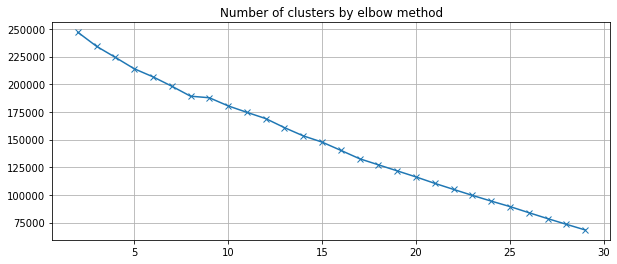

In [32]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1,1,1)
plt.grid(True)
plt.title('Number of clusters by elbow method')
plt.plot(no_of_clusters,inertias_arr,marker='x')
plt.show()

# Silhouettes Method :

# fig.add_subplot(1,1,1)
plt.grid(True)
plt.title('Number of clusters by Silhouettes scores method')
plt.plot(no_of_clusters,silhouettes_arr,marker='o')
plt.tight_layout()
plt.show()

In [34]:
print("By visualizing Elbow Method and Silhouettes Method,the best choice for the formation of clusters are : 10 ")

By visualizing Elbow Method and Silhouettes Method,the best choice for the formation of clusters are : 10 


# Formation of Clusters by using Silhouettes method   :

In [35]:
import re
from collections import Counter
import itertools

In [36]:
k_means = KMeans(n_clusters=21, init='k-means++', random_state=21, n_jobs=10)
k_means = k_means.fit(pca_feature_df)
label = k_means.predict(pca_feature_df)

In [37]:
def clusters_list(pca_feature_df,clusters):
    print('Clusters are :', end = ' ')
    print(clusters)
    groups = pca_feature_df.groupby(clusters)
    i = 0
    print('\n') 
    for label,grp in groups:
        print('Clusters List:', end = ' ')
        print(i)
        i = i+1
        names = items_data.loc[grp.index,"Item_name"]
        for index, name in enumerate(names):
            print(index+1,name)
        print('\n') 

In [38]:
def no_of_clusters_ftn(n_clusters,n_components=48):
    k_means = KMeans(n_clusters=n_clusters, init='k-means++', random_state=48)
    k_means = k_means.fit(pca_feature_df)
    no_of_clusters = k_means.predict(pca_feature_df)
    clusters_list(pca_feature_df, k_means.labels_)

In [39]:
no_of_clusters_ftn(n_clusters=10)

Clusters are : [6 5 7 4 9 1 4 8 1 3 9 4 6 8 4 8 1 0 4 2 8 0 1 4 2 0 0 0 4 9 9 2 4 6 4 0 6
 1 6 2 0 3 1 3 3 2 1 8]


Clusters List: 0
1 flour
2 frozen vegetables
3 pork
4 bananas
5 berries
6 lettuce
7 aluminum foil


Clusters List: 1
1 dinner rolls
2 canned vegetables
3 cereals
4 ice cream
5 dishwashing 
6 shampoo
7 baby items


Clusters List: 2
1 pasta
2 beef
3 broccoli
4 toilet paper
5 shaving cream


Clusters List: 3
1 spaghetti sauce
2 sandwich bags
3 soap
4 hand soap


Clusters List: 4
1 soda
2 tortillas
3 cheeses
4 yogurt
5 sugar
6 poultry
7 cherries
8 carrots
9 cucumbers


Clusters List: 5
1 tea


Clusters List: 6
1 coffee
2 eggs
3 cauliflower
4 laundry detergent
5 paper towels


Clusters List: 7
1 juice


Clusters List: 8
1 bagels
2 milk
3 butter
4 waffles
5 pet items


Clusters List: 9
1 sandwich loaves
2 ketchup
3 grapefruit
4 apples




# visualization :

In [40]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=10, n_jobs=10)
k_means = k_means.fit(pca_feature_df)
label = k_means.predict(pca_feature_df)

In [41]:
def visualize_clusters(pca_feature_df,labels):
    fig = plt.figure(figsize=(7, 7))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])
    groups = pca_feature_df.groupby(labels)
    i = 0
    for label,grp in groups:
        plt.scatter(grp.PCA_1,grp.PCA_2,c=next(colors),label = label)
    for itemid in pca_feature_df.index:
        x = pca_feature_df.loc[itemid,"PCA_1"]
        y = pca_feature_df.loc[itemid,"PCA_2"]
        name = items_data.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)
        plt.tight_layout()
        plt.grid(True)
        plt.legend(loc="best")

In [42]:
def no_of_clusters_ftn(n_clusters,n_components=48):
    k_means = KMeans(n_clusters=n_clusters, init='k-means++', random_state=48)
    k_means = k_means.fit(pca_feature_df)
    no_of_clusters = k_means.predict(pca_feature_df)
    visualize_clusters(pca_feature_df, k_means.labels_)

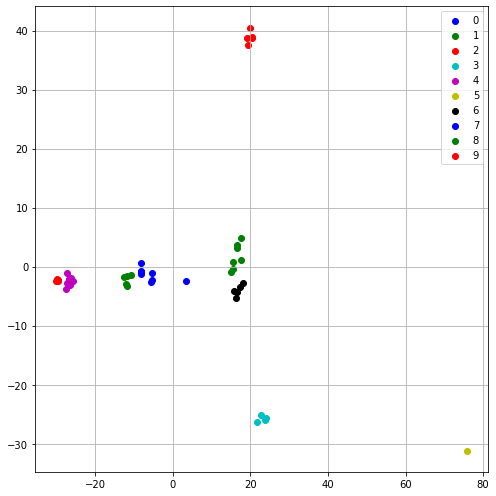

In [43]:
no_of_clusters_ftn(n_clusters=10)

# Formation of Clusters by taking a random number :

In [44]:
k_means = KMeans(n_clusters=5, init='k-means++', random_state=21, n_jobs=10)
k_means = k_means.fit(pca_feature_df)
label = k_means.predict(pca_feature_df)

In [45]:
def clusters_list(pca_feature_df,clusters):
    print('Clusters are :', end = ' ')
    print(clusters)
    groups = pca_feature_df.groupby(clusters)
    i = 0
    print('\n') 
    for label,grp in groups:
        print('Clusters List:', end = ' ')
        print(i)
        i = i+1
        names = items_data.loc[grp.index,"Item_name"]
        for index, name in enumerate(names):
            print(index+1,name)
        print('\n') 

In [46]:
def no_of_clusters_ftn(n_clusters,n_components=48):
    k_means = KMeans(n_clusters=n_clusters, init='k-means++', random_state=48)
    k_means = k_means.fit(pca_feature_df)
    no_of_clusters = k_means.predict(pca_feature_df)
    clusters_list(pca_feature_df, k_means.labels_)

In [47]:
no_of_clusters_ftn(n_clusters=5)

Clusters are : [1 2 0 4 4 1 4 0 1 1 4 4 1 0 4 0 1 0 4 3 0 0 1 4 3 0 0 0 4 4 4 3 4 1 4 0 1
 1 1 3 0 1 1 1 1 3 1 0]


Clusters List: 0
1 juice
2 bagels
3 milk
4 butter
5 flour
6 waffles
7 frozen vegetables
8 pork
9 bananas
10 berries
11 lettuce
12 aluminum foil
13 pet items


Clusters List: 1
1 coffee
2 dinner rolls
3 canned vegetables
4 spaghetti sauce
5 eggs
6 cereals
7 ice cream
8 cauliflower
9 laundry detergent
10 dishwashing 
11 paper towels
12 sandwich bags
13 shampoo
14 soap
15 hand soap
16 baby items


Clusters List: 2
1 tea


Clusters List: 3
1 pasta
2 beef
3 broccoli
4 toilet paper
5 shaving cream


Clusters List: 4
1 soda
2 sandwich loaves
3 tortillas
4 ketchup
5 cheeses
6 yogurt
7 sugar
8 poultry
9 cherries
10 grapefruit
11 apples
12 carrots
13 cucumbers




# visualization :

In [48]:
def visualize_clusters(pca_feature_df,labels):
    fig = plt.figure(figsize=(7, 7))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])
    groups = pca_feature_df.groupby(labels)
    i = 1
    for label,grp in groups:
        plt.scatter(grp.PCA_1,grp.PCA_2,c=next(colors),label = label)
    for itemid in pca_feature_df.index:
        x = pca_feature_df.loc[itemid,"PCA_1"]
        y = pca_feature_df.loc[itemid,"PCA_2"]
        name = items_data.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)
        plt.tight_layout()
        plt.grid(True)
        plt.legend(loc="best")

In [49]:
def no_of_clusters_ftn(n_clusters,n_components=48):
    k_means = KMeans(n_clusters=n_clusters, init='k-means++', random_state=48)
    k_means = k_means.fit(pca_feature_df)
    no_of_clusters = k_means.predict(pca_feature_df)
    visualize_clusters(pca_feature_df, k_means.labels_)

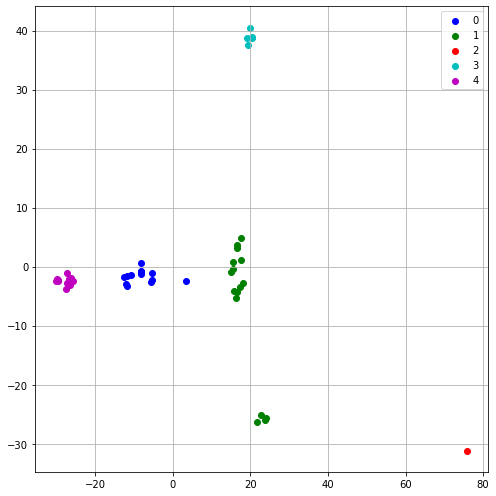

In [50]:
no_of_clusters_ftn(n_clusters=5)